https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [1]:
import pandas as pd
import wikipedia
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
articles=['american football','Computer Vision Object detection Object Classification'
          ,'Badminton','Data Science','Artificial intelligence','Deep Learning',
          'European Central Bank','ChatBot Virtual Assistant','FinTech Financial Technology',
          'Cryptocurrency','Basketball','Soccer',]

### Get articles

In [2]:
articles=['american football','Computer Vision Object detection Object Classification','Badminton','Data Science','Artificial intelligence','Deep Learning','European Central Bank',
          'ChatBot Virtual Assistant','FinTech Financial Technology','Cryptocurrency','Basketball','Soccer',]
wiki_lst=[]
title=[]

In [3]:
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)

print("examine content")

loading content:  american football
loading content:  Computer Vision Object detection Object Classification
loading content:  Badminton
loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Deep Learning
loading content:  European Central Bank
loading content:  ChatBot Virtual Assistant
loading content:  FinTech Financial Technology
loading content:  Cryptocurrency
loading content:  Basketball
loading content:  Soccer
examine content


In [4]:
article_df = pd.DataFrame(wiki_lst)
article_df

,0
0,"American football, referred to simply as footb..."
1,Object detection is a computer technology rela...
2,Badminton is a racquet sport played using racq...
3,Data science is an interdisciplinary field tha...
4,Artificial intelligence (AI) is intelligence d...
5,Deep learning (also known as deep structured ...
6,The European Central Bank (ECB) is the prime c...
7,An intelligent virtual assistant (IVA) or inte...
8,Financial technology (abbreviated fintech or F...
9,"A cryptocurrency, crypto-currency, crypto, or ..."


In [5]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

article_df['cleaned_data'] = article_df[0].apply(clean_data)
article_df.head()

,0,cleaned_data
0,"American football, referred to simply as footb...",American football referred to simply as footba...
1,Object detection is a computer technology rela...,Object detection is a computer technology rela...
2,Badminton is a racquet sport played using racq...,Badminton is a racquet sport played using racq...
3,Data science is an interdisciplinary field tha...,Data science is an interdisciplinary field tha...
4,Artificial intelligence (AI) is intelligence d...,Artificial intelligence AI is intelligence dem...


In [6]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

article_df['cleaned_data'] = article_df['cleaned_data'].apply(drop_numbers)
article_df.head()

,0,cleaned_data
0,"American football, referred to simply as footb...",American football referred to simply as footba...
1,Object detection is a computer technology rela...,Object detection is a computer technology rela...
2,Badminton is a racquet sport played using racq...,Badminton is a racquet sport played using racq...
3,Data science is an interdisciplinary field tha...,Data science is an interdisciplinary field tha...
4,Artificial intelligence (AI) is intelligence d...,Artificial intelligence AI is intelligence dem...


In [7]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

article_df['cleaned_data'] = article_df['cleaned_data'].apply(lower_case)
article_df.head()

,0,cleaned_data
0,"American football, referred to simply as footb...",american football referred to simply as footba...
1,Object detection is a computer technology rela...,object detection is a computer technology rela...
2,Badminton is a racquet sport played using racq...,badminton is a racquet sport played using racq...
3,Data science is an interdisciplinary field tha...,data science is an interdisciplinary field tha...
4,Artificial intelligence (AI) is intelligence d...,artificial intelligence ai is intelligence dem...


In [8]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

article_df['cleaned_data'] = article_df['cleaned_data'].apply(lemmatise)
article_df.head()

,0,cleaned_data
0,"American football, referred to simply as footb...",american football referred to simply a footbal...
1,Object detection is a computer technology rela...,object detection is a computer technology rela...
2,Badminton is a racquet sport played using racq...,badminton is a racquet sport played using racq...
3,Data science is an interdisciplinary field tha...,data science is an interdisciplinary field tha...
4,Artificial intelligence (AI) is intelligence d...,artificial intelligence ai is intelligence dem...


In [10]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

article_df['cleaned_data'] = article_df['cleaned_data'].apply(remove_stopword)
article_df.head()

,0,cleaned_data
0,"American football, referred to simply as footb...",american football referred simply football uni...
1,Object detection is a computer technology rela...,object detection computer technology related c...
2,Badminton is a racquet sport played using racq...,badminton racquet sport played using racquet h...
3,Data science is an interdisciplinary field tha...,data science interdisciplinary field us scient...
4,Artificial intelligence (AI) is intelligence d...,artificial intelligence ai intelligence demons...


### Represent each article as a vector

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(article_df['cleaned_data']) 

In [19]:
print(X.min())

0.0


### Perform k-means clustering

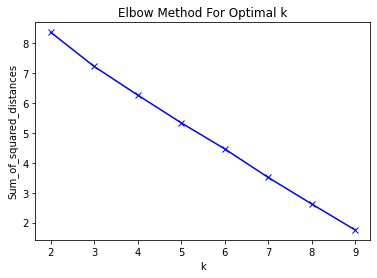

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                                                title  cluster
3                                        Data Science        0
0                                   american football        1
2                                           Badminton        1
10                                         Basketball        1
11                                             Soccer        1
1   Computer Vision Object detection Object Classi...        2
4                             Artificial intelligence        2
5                                       Deep Learning        2
7                           ChatBot Virtual Assistant        2
6                               European Central Bank        3
8                        FinTech Financial Technology        3
9                                      Cryptocurrency        3


### Evaluate the result

Cluster: 0
Titles
 Data Science


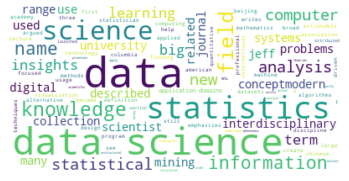

Cluster: 1
Titles
 american football
         Badminton
        Basketball
            Soccer


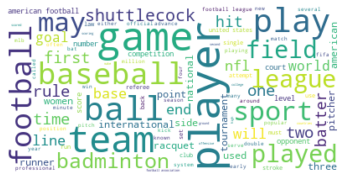

Cluster: 2
Titles
 Computer Vision Object detection Object Classi...
                           Artificial intelligence
                                     Deep Learning
                         ChatBot Virtual Assistant


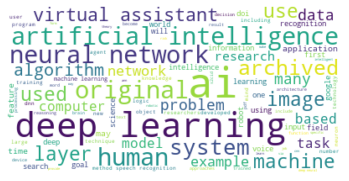

Cluster: 3
Titles
        European Central Bank
 FinTech Financial Technology
               Cryptocurrency


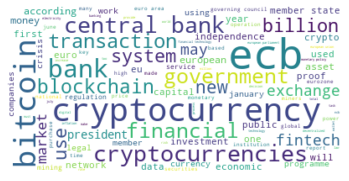

In [15]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']         
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()